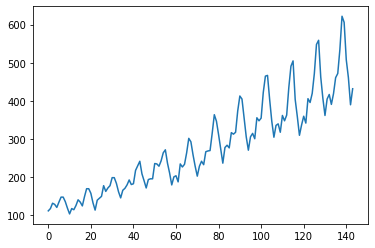

In [2]:
import pandas
import matplotlib.pyplot as plt
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#import dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


In [3]:
# split into train and test sets 67% of the observations that we can use to train our model, 
#leaving the remaining 33% for testing the model.

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
print(train.shape)

96 48
(96, 1)


In [4]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [5]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

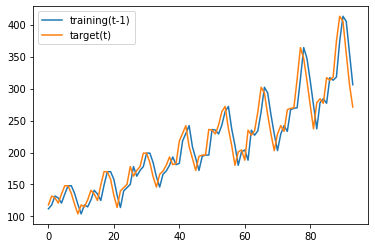

In [9]:

plt.plot(trainX, label ='training(t-1)')
plt.plot(trainY, label = 'target(t)')
plt.legend()
plt.show()

In [7]:
print(trainX, trainY)
print(trainX.shape)
print(trainY.shape)

[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]
 [104.]
 [118.]
 [115.]
 [126.]
 [141.]
 [135.]
 [125.]
 [149.]
 [170.]
 [170.]
 [158.]
 [133.]
 [114.]
 [140.]
 [145.]
 [150.]
 [178.]
 [163.]
 [172.]
 [178.]
 [199.]
 [199.]
 [184.]
 [162.]
 [146.]
 [166.]
 [171.]
 [180.]
 [193.]
 [181.]
 [183.]
 [218.]
 [230.]
 [242.]
 [209.]
 [191.]
 [172.]
 [194.]
 [196.]
 [196.]
 [236.]
 [235.]
 [229.]
 [243.]
 [264.]
 [272.]
 [237.]
 [211.]
 [180.]
 [201.]
 [204.]
 [188.]
 [235.]
 [227.]
 [234.]
 [264.]
 [302.]
 [293.]
 [259.]
 [229.]
 [203.]
 [229.]
 [242.]
 [233.]
 [267.]
 [269.]
 [270.]
 [315.]
 [364.]
 [347.]
 [312.]
 [274.]
 [237.]
 [278.]
 [284.]
 [277.]
 [317.]
 [313.]
 [318.]
 [374.]
 [413.]
 [405.]
 [355.]
 [306.]] [118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126. 141.
 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163. 172.
 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218. 230.
 242. 209. 191. 172. 194. 196. 196

In [9]:

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 64114.9258
Epoch 2/200
47/47 - 0s - loss: 41968.1523
Epoch 3/200
47/47 - 0s - loss: 26529.8555
Epoch 4/200
47/47 - 0s - loss: 16087.9336
Epoch 5/200
47/47 - 0s - loss: 9347.1699
Epoch 6/200
47/47 - 0s - loss: 5195.3394
Epoch 7/200
47/47 - 0s - loss: 2920.8418
Epoch 8/200
47/47 - 0s - loss: 1726.6052
Epoch 9/200
47/47 - 0s - loss: 1097.1244
Epoch 10/200
47/47 - 0s - loss: 779.9258
Epoch 11/200
47/47 - 0s - loss: 636.3376
Epoch 12/200
47/47 - 0s - loss: 577.1066
Epoch 13/200
47/47 - 0s - loss: 552.2745
Epoch 14/200
47/47 - 0s - loss: 541.2635
Epoch 15/200
47/47 - 0s - loss: 541.9352
Epoch 16/200
47/47 - 0s - loss: 544.0171
Epoch 17/200
47/47 - 0s - loss: 539.0184
Epoch 18/200
47/47 - 0s - loss: 536.4257
Epoch 19/200
47/47 - 0s - loss: 537.8280
Epoch 20/200
47/47 - 0s - loss: 537.4670
Epoch 21/200
47/47 - 0s - loss: 538.1540
Epoch 22/200
47/47 - 0s - loss: 538.3068
Epoch 23/200
47/47 - 0s - loss: 538.1924
Epoch 24/200
47/47 - 0s - loss: 542.6761
Epoch 25/200

47/47 - 0s - loss: 535.6797
Epoch 199/200
47/47 - 0s - loss: 539.4952
Epoch 200/200
47/47 - 0s - loss: 540.1488


In [11]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 530.58 MSE (23.03 RMSE)
Test Score: 2351.33 MSE (48.49 RMSE)


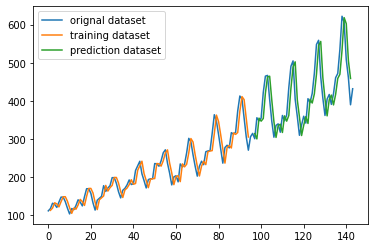

In [14]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset, label ='orignal dataset')
plt.plot(trainPredictPlot, label ='training dataset')
plt.plot(testPredictPlot, label ='prediction dataset')
plt.legend()
plt.show()